## scRNA-seq of WT, gtl1, df1 and gtl1 df1

In [1]:
library(tidyverse)
library(Seurat)
library(cowplot)
library(patchwork)
library(future)
#for 200gb ram 
options(future.globals.maxSize = 200000 * 1024^2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [2]:
rc.integrated <- readRDS("../data/integrations/rc.integrated_11S_gtl1_df1_Li_seu3_clean.rds")

## Cell type and developmental stage metadata

- Developmental stage: `time_zone`
- Cell type:`cell_type`
- Combination of cell type and developmental stage: `time_zone_cell_type`
- Combination of cell type and developmental stage with cell subtypes (not used): `time_zone_cell_subtypes` 

In [3]:
rc.integrated

An object of class Seurat 
70780 features across 74810 samples within 3 assays 
Active assay: integrated (17681 features, 17681 variable features)
 2 other assays present: RNA, SCT
 4 dimensional reductions calculated: pca, umap, umap_3D, umap_2D

In [4]:
table(rc.integrated$genotype, rc.integrated$sample)

          
           sc_122 sc_123 sc_124 sc_125 sc_126 sc_127 sc_128 sc_129
  df1           0      0   9058      0      0      0   6620      0
  gtl1          0  11141      0      0      0  11453      0      0
  gtl1_df1      0      0      0  10012      0      0      0   7622
  WT        11614      0      0      0   7290      0      0      0

In [5]:
rc.integrated <- subset(rc.integrated, 
                        subset = sample %in% c("sc_122",
                                              "sc_123",
                                              "sc_124",
                                              "sc_125",
                                              "sc_126",
                                              "sc_127",
                                              "sc_128",
                                              "sc_129"))

In [6]:
rc.integrated$genotype <- factor(rc.integrated$genotype, 
                                 levels=c("WT", 
                                          "gtl1", 
                                          "df1", 
                                          "gtl1_df1"))

In [7]:
table(rc.integrated$genotype)


      WT     gtl1      df1 gtl1_df1 
   18904    22594    15678    17634 

In [8]:
rc.integrated

An object of class Seurat 
70780 features across 74810 samples within 3 assays 
Active assay: integrated (17681 features, 17681 variable features)
 2 other assays present: RNA, SCT
 4 dimensional reductions calculated: pca, umap, umap_3D, umap_2D

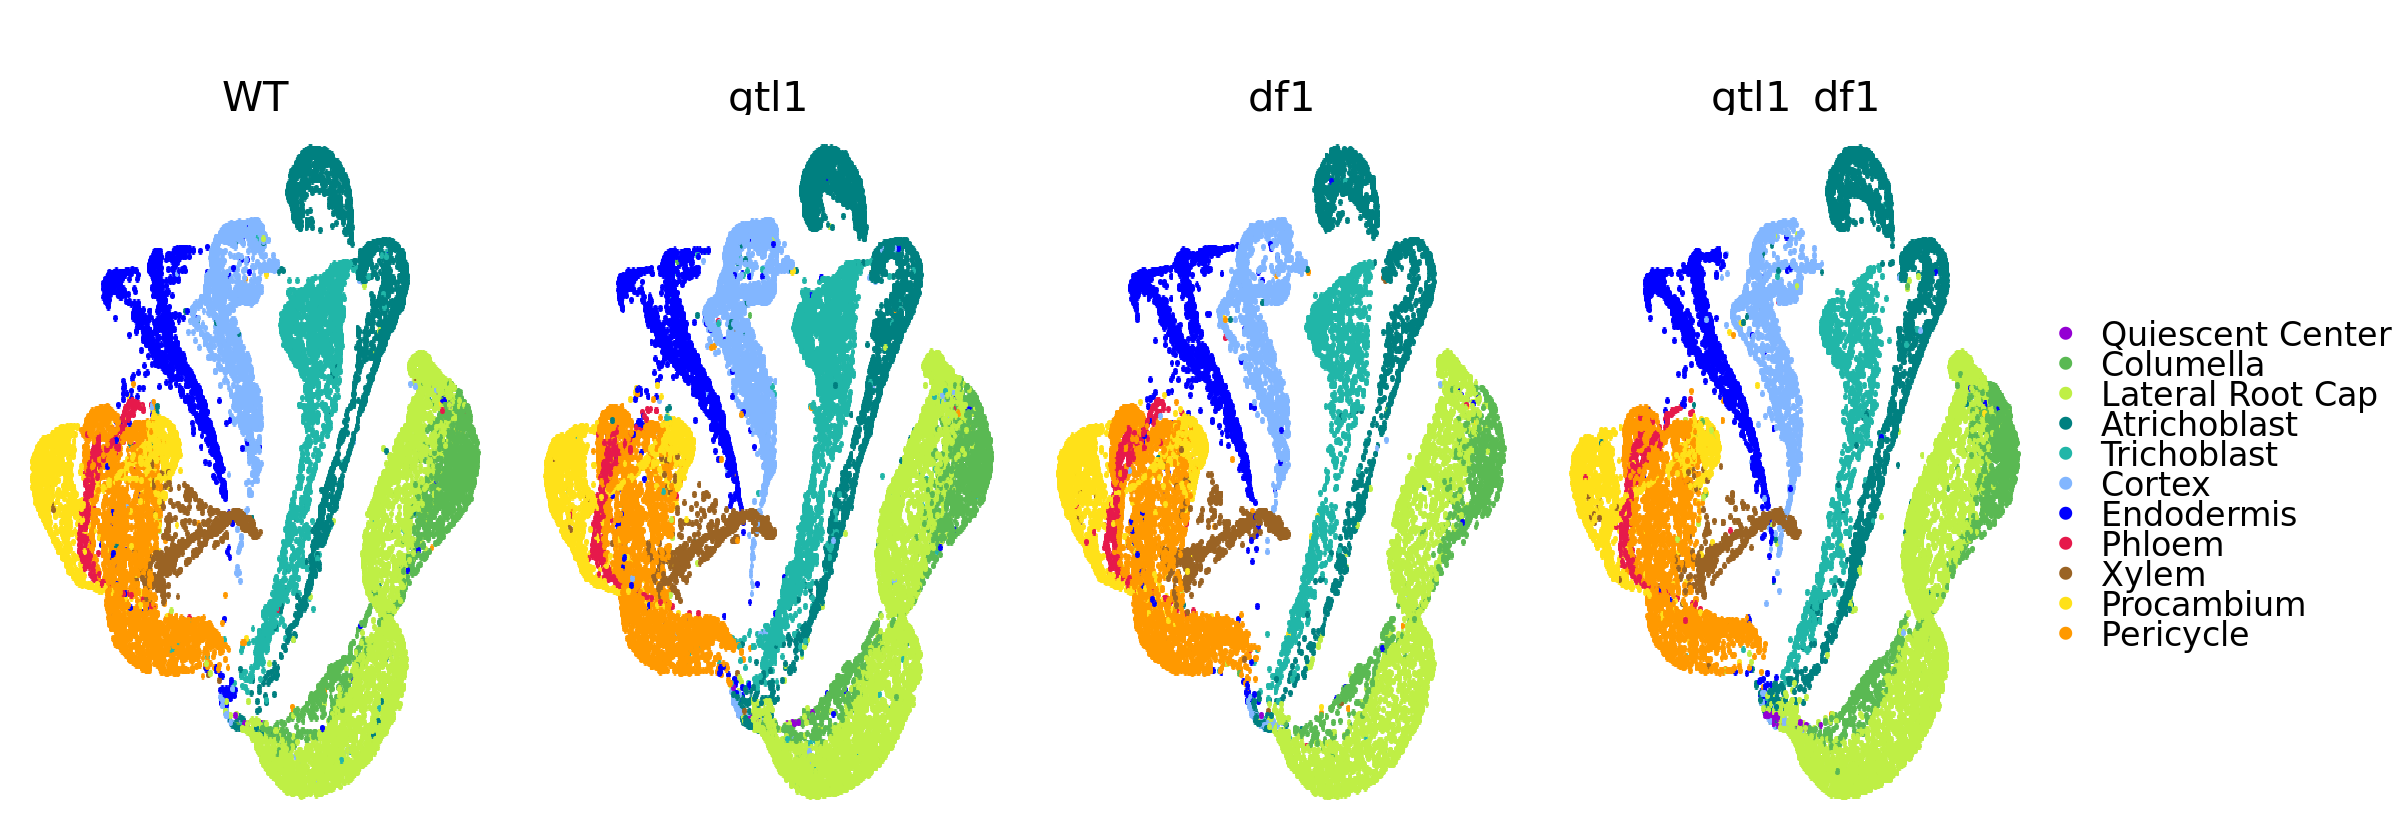

In [9]:
options(repr.plot.width=20, repr.plot.height=7)

# Plot celltype annotation Li
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Phloem","Protophloem", "Xylem", "Procambium","Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400D3", "#DCD0FF","#5AB953", "#BFEF45", "#008080", "#21B6A8", "#82B6FF", "#0000FF","#E6194B", "#DD77EC", "#9A6324", "#FFE119", "#FF9900", "#FFD4E3", "#9A6324", "#DDAA6F", "#EEEEEE")
rc.integrated$cell_type <- factor(rc.integrated$cell_type, levels = order[sort(match(unique(rc.integrated$cell_type),order))])
color <- palette[sort(match(unique(rc.integrated$cell_type),order))]




(cell <- DimPlot(rc.integrated, reduction = "umap", group.by = "cell_type", cols = color, split.by = 'genotype', pt.size = 2, ncol=6, raster = T) + 
                        theme(plot.margin = margin(0.5,0.5,0.5,0.5, "cm")) + 
                         ggtitle("") +
                         theme_void(base_size = 25) &
                            theme(plot.title = element_text(hjust = 0.5)) +
theme(strip.text = NULL))

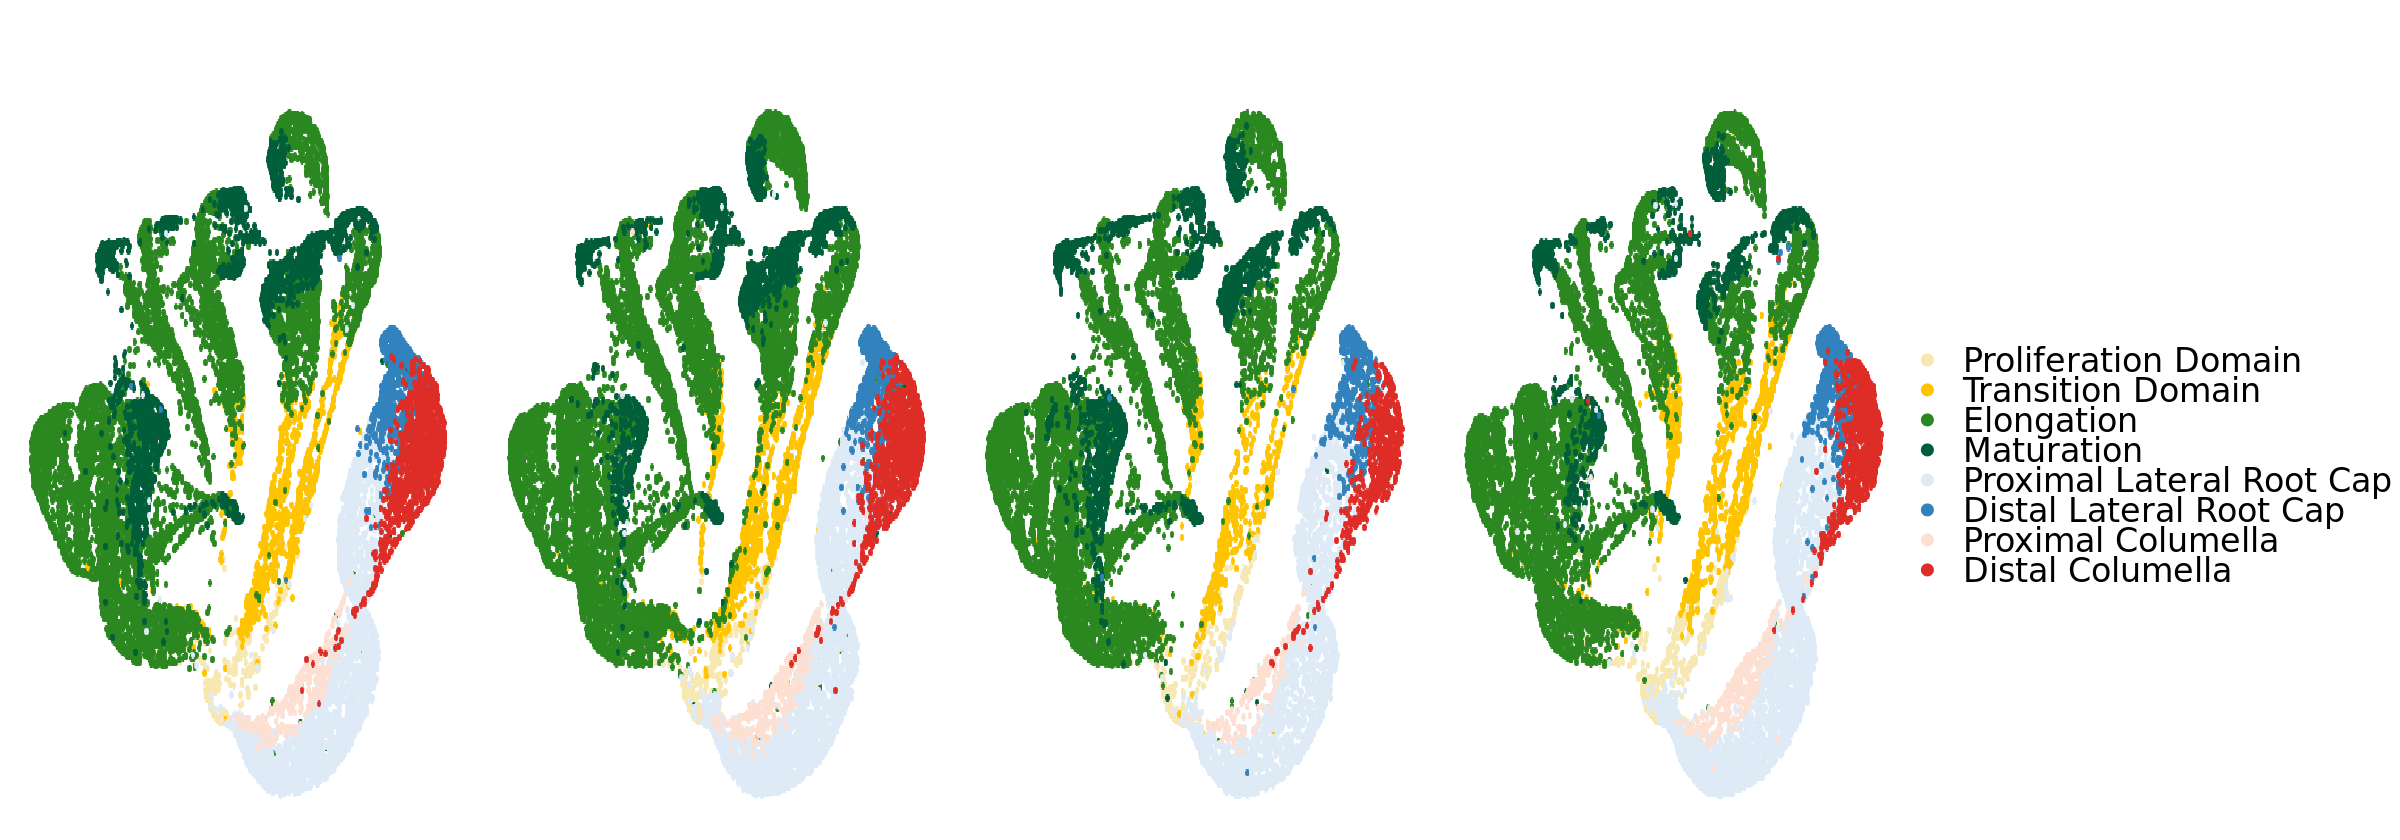

In [10]:
options(repr.plot.width=20, repr.plot.height=7)
(time <-DimPlot(rc.integrated, 
        group.by = "time_zone", 
order = c("Distal Columella","Proximal Columella","Distal Lateral Root Cap","Proximal Lateral Root Cap","Maturation","Elongation", "Transition Domain", "Proliferation Domain"),
        cols = c('#F7E7B0','#FFC400','#2B871F','#005E3B', "#deebf7", "#3182bd", '#fee0d2','#de2d26'),
        split.by = 'genotype', 
        pt.size = 2,
        ncol=6, 
        raster = T) +  theme(plot.margin = margin(0.5,0.5,0.5,0.5, "cm")) + 
                         ggtitle("") +
                         theme_void(base_size = 25) &
                            theme(plot.title = element_text(hjust = 0.5))+ theme(strip.text = element_text(size=0)))

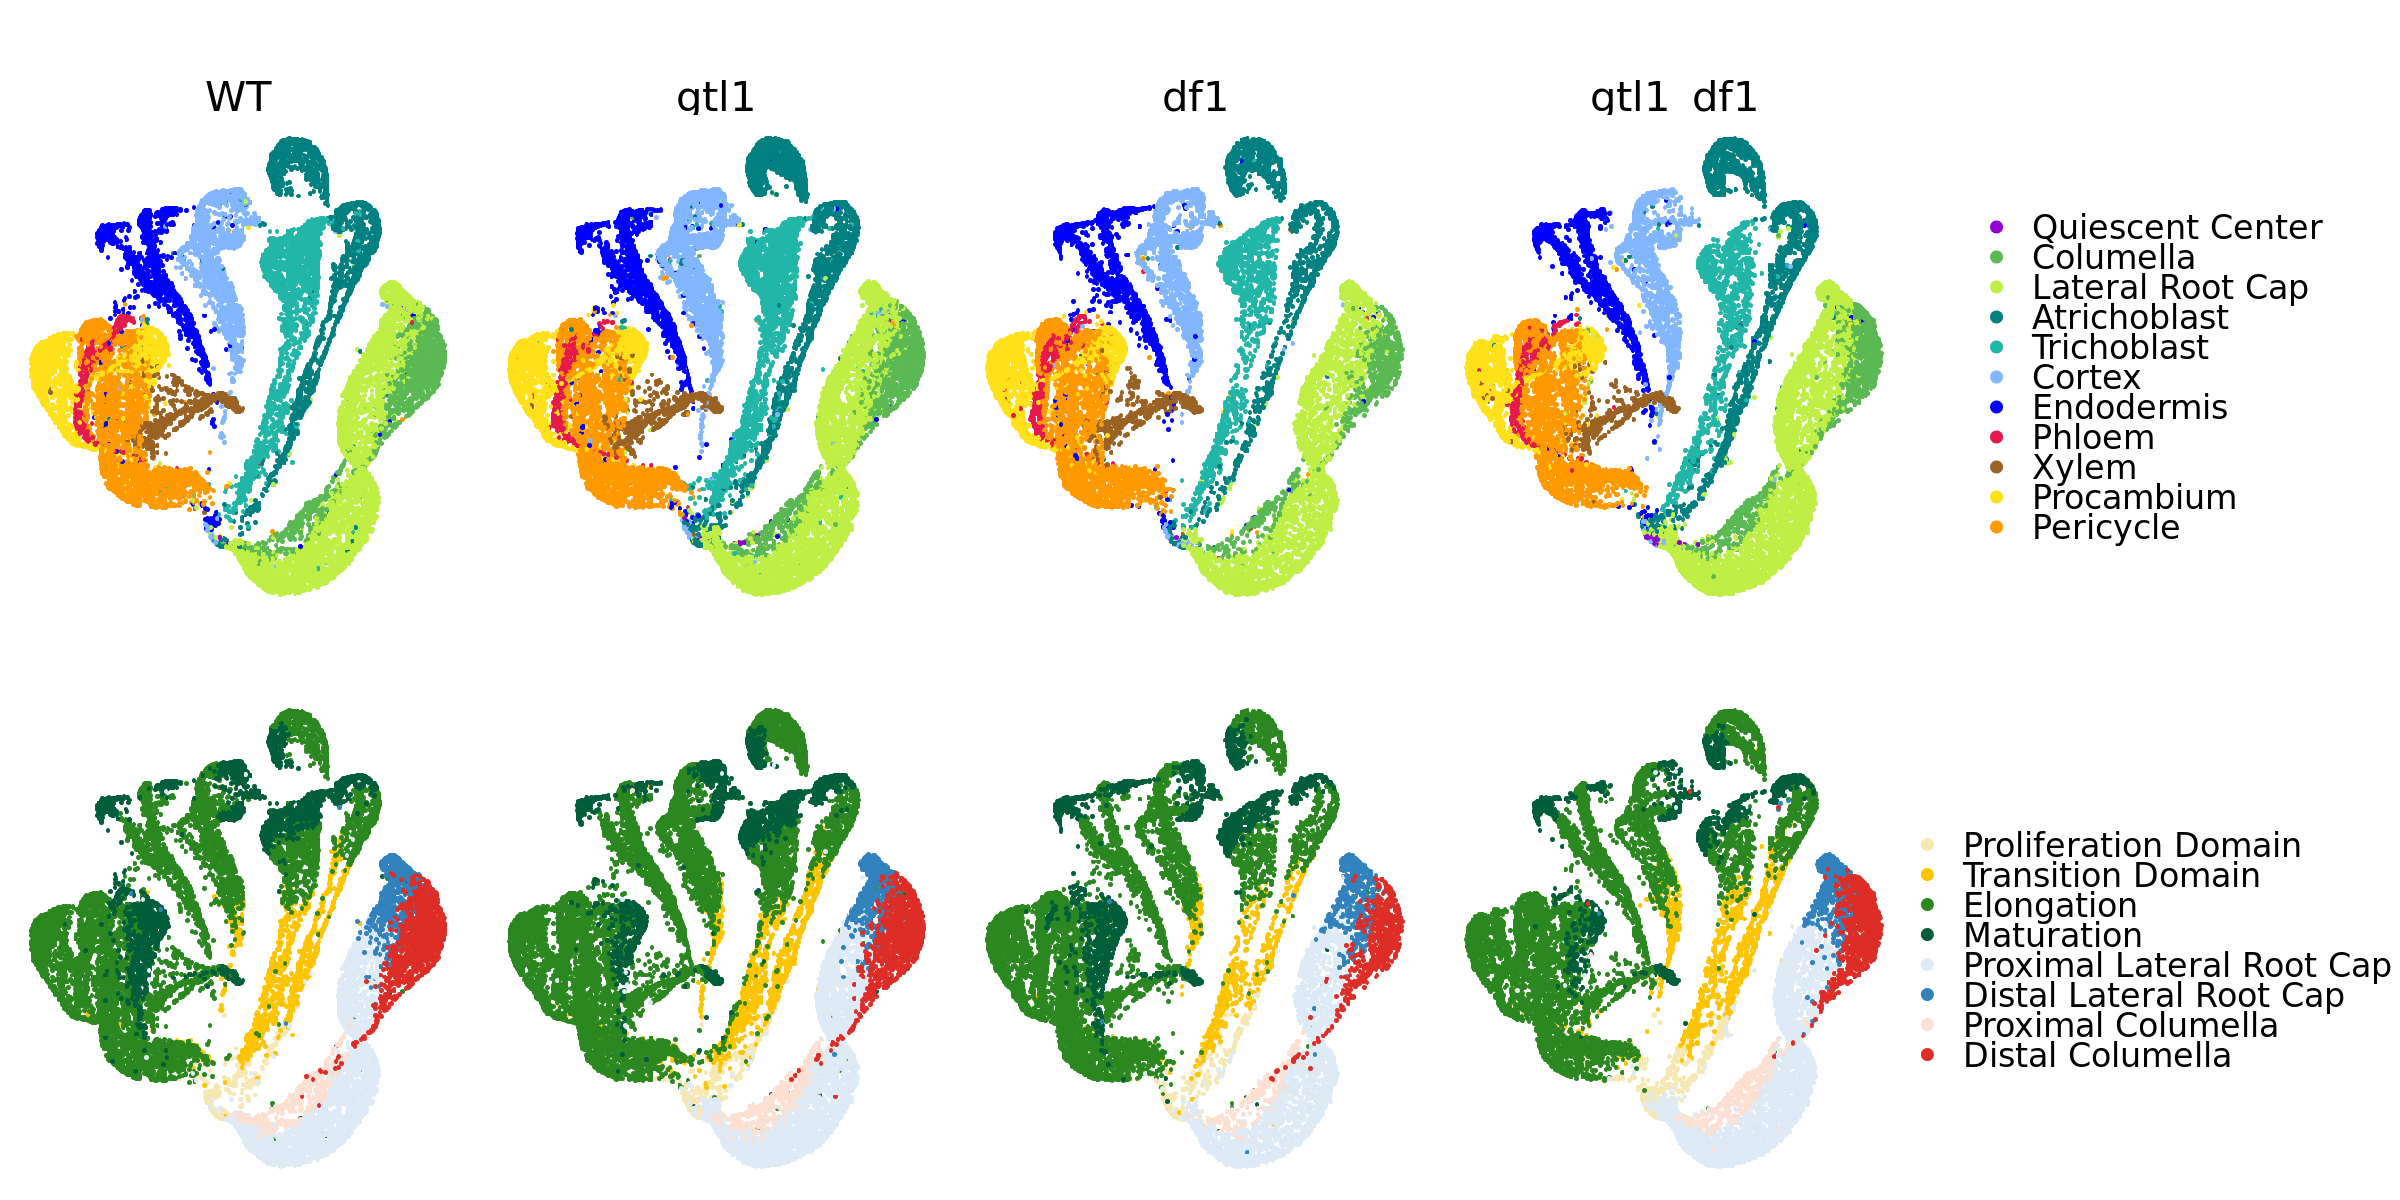

In [11]:
options(repr.plot.width=20, repr.plot.height=10)

cell/time 

ggsave("./output/gtl1df1_umaps.pdf", width=20, height=10)